### Your task is to do research and solve various tasks provided below to the degree of your imagination.
1.	Figure out what columns provided in the dataset represent and their importance.
2.	Explore the database and provide the highlights/most important thigs in an appropriate form.
3.	Identify stocks/group of stocks which have similar behaviors based on data driven approaches.
4.	Use the historical data (2010-2020) in order to develop a model which would be able to predict future behavior of stocks. 
5.	Test that/those models on 2021 data in order to assess the quality of your predictions.
6.	Your model(s) will probably have both good and bad prediction capability of future stock prices. Try to figure out what is the main source of deterioration of model(s)’ prediction capability.


# Importing libraries

In [118]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
# import matplotlib.dates as mdates
# import matplotlib.colors as mcolors
from matplotlib import style
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['text.color'] = 'k'

# Dataset loading

In [119]:
df=pd.read_csv('C:\\Users\\ChefAbi\\Downloads\\NASDAQ_100_Data_From_2010.csv',sep='\t')

In [120]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL
...,...,...,...,...,...,...,...,...
271675,2021-09-03,295.325012,301.804993,292.029999,298.290009,298.290009,6127900,ZM
271676,2021-09-07,298.295013,300.980011,294.799988,299.959991,299.959991,4251900,ZM
271677,2021-09-08,299.549988,299.959991,290.529999,293.600006,293.600006,3934400,ZM
271678,2021-09-09,292.160004,297.570007,291.130005,295.859985,295.859985,3350100,ZM


##### Date - datetime
##### Open -  the prices at which a stock began in a given time period
##### Close - the prices at which a stock ended trading in a given time period
##### Low -  the minimum prices in a given time period.
##### High - the maximum prices in a given time period.
##### Adj Close - adjusted close prices 
##### Volume - a number of shares

In [121]:
df.shape

(271680, 8)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       271680 non-null  object 
 1   Open       271680 non-null  float64
 2   High       271680 non-null  float64
 3   Low        271680 non-null  float64
 4   Close      271680 non-null  float64
 5   Adj Close  271680 non-null  float64
 6   Volume     271680 non-null  int64  
 7   Name       271680 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.6+ MB


In [123]:
#Date column should be in date format
df['Date']=pd.to_datetime(df['Date'])

In [124]:
df.isnull().sum()
#No missing values in data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64

### This is a list of stocks

In [125]:
df['Name'].unique()

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD',
       'AMGN', 'AMZN', 'ANSS', 'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB',
       'BKNG', 'CDNS', 'CDW', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST',
       'CPRT', 'CRWD', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DOCU',
       'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA',
       'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INCY', 'INTC',
       'INTU', 'ISRG', 'JD', 'KDP', 'KHC', 'KLAC', 'LRCX', 'LULU', 'MAR',
       'MCHP', 'MDLZ', 'MELI', 'MNST', 'MRNA', 'MRVL', 'MSFT', 'MTCH',
       'MU', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'OKTA', 'ORLY', 'PAYX',
       'PCAR', 'PDD', 'PEP', 'PTON', 'PYPL', 'QCOM', 'REGN', 'ROST',
       'SBUX', 'SGEN', 'SIRI', 'SNPS', 'SPLK', 'SWKS', 'TCOM', 'TEAM',
       'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDAY',
       'XEL', 'XLNX', 'ZM'], dtype=object)

In [126]:
df['Name'].nunique()

102

In [127]:
df=df.set_index('Date')

In [128]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


### Stocks' symbols and their full names

In [129]:
stock_names = {
    'AAPL': 'Apple Inc.',
    'ADBE': 'Adobe Inc.',
    'ADI': 'Analog Devices, Inc.',
    'ADP': 'Automatic Data Processing, Inc.',
    'ADSK': 'Autodesk, Inc.',
    'AEP': 'American Electric Power Company, Inc.',
    'ALGN': 'Align Technology, Inc.',
    'AMAT': 'Applied Materials, Inc.',
    'AMD': 'Advanced Micro Devices, Inc.',
    'AMGN': 'Amgen Inc.',
    'AMZN': 'Amazon.com, Inc.',
    'ANSS': 'ANSYS, Inc.',
    'ASML': 'ASML Holding N.V.',
    'ATVI': 'Activision Blizzard, Inc.',
    'AVGO': 'Broadcom Inc.',
    'BIDU': 'Baidu, Inc.ADS',
    'BIIB': 'Biogen Inc.',
    'BKNG': 'Booking Holdings Inc.',
    'CDNS': 'Cadence Design Systems, Inc.',
    'CDW': 'CDW Corporation',
    'CERN': 'Cerner Corporation',
    'CHKP': 'Check Point Software Technologies Ltd.',
    'CHTR': 'Charter Communications, Inc.New',
    'CMCSA': 'Comcast Corporation',
    'COST': 'Costco Wholesale Corporation',
    'CPRT': 'Copart, Inc.(DE)',
    'CRWD': 'CrowdStrike Holdings, Inc.',
    'CSCO': 'Cisco Systems, Inc.(DE)',
    'CSX': 'CSX Corporation',
    'CTAS': 'Cintas Corporation',
    'CTSH': 'Cognizant Technology Solutions Corporation',
    'DLTR': 'Dollar Tree Inc.',
    'DOCU': 'DocuSign, Inc.',
    'DXCM': 'DexCom, Inc.',
    'EA': 'Electronic Arts Inc.',
    'EBAY': 'eBay Inc.',
    'EXC': 'Exelon Corporation',
    'FAST': 'Fastenal Company',
    'FB': 'Facebook, Inc.',
    'FISV': 'Fiserv, Inc.',
    'FOX': 'Fox Corporation Class B',
    'FOXA': 'Fox Corporation',
    'GILD': 'Gilead Sciences, Inc.',
    'GOOG': 'Alphabet Inc.Class C Capital Stock',
    'GOOGL': 'Alphabet Inc.',
    'HON': 'Honeywell International Inc.',
    'IDXX': 'IDEXX Laboratories, Inc.',
    'ILMN': 'Illumina, Inc.',
    'INCY': 'Incyte Corp.',
    'INTC': 'Intel Corporation',
    'INTU': 'Intuit Inc.',
    'ISRG': 'Intuitive Surgical, Inc.',
    'JD': 'JD.com, Inc.',
    'KDP': 'Keurig Dr Pepper Inc.',
    'KHC': 'The Kraft Heinz Company',
    'KLAC': 'KLA Corporation',
    'LRCX': 'Lam Research Corporation',
    'LULU': 'lululemon athletica inc.',
    'MAR': 'Marriott International',
    'MCHP': 'Microchip Technology Incorporated',
    'MDLZ': 'Mondelez International, Inc.',
    'MELI': 'MercadoLibre, Inc.',
    'MNST': 'Monster Beverage Corporation',
    'MRNA': 'Moderna, Inc.',
    'MRVL': 'Marvell Technology, Inc.',
    'MSFT': 'Microsoft Corporation',
    'MTCH': 'Match Group, Inc.',
    'MU': 'Micron Technology, Inc.',
    'NFLX': 'Netflix, Inc.',
    'NTES': 'NetEase, Inc.',
    'NVDA': 'NVIDIA Corporation',
    'NXPI': 'NXP Semiconductors N.V.',
    'OKTA': 'Okta, Inc.',
    'ORLY': 'O Reilly Automotive,Inc.',
    'PAYX': 'Paychex, Inc.',
    'PCAR': 'PACCAR Inc.',
    'PDD': 'Pinduoduo Inc.',
    'PEP': 'PepsiCo, Inc.',
    'PTON': 'Peloton Interactive, Inc.',
    'PYPL': 'PayPal Holdings, Inc.',
    'QCOM': 'QUALCOMM Incorporated',
    'REGN': 'Regeneron Pharmaceuticals, Inc.',
    'ROST': 'Ross Stores, Inc.',
    'SBUX': 'Starbucks Corporation',
    'SGEN': 'Seagen Inc.',
    'SIRI': 'Sirius XM Holdings Inc.',
    'SNPS': 'Synopsys, Inc.',
    'SPLK': 'Splunk Inc.',
    'SWKS': 'Skyworks Solutions, Inc.',
    'TCOM': 'Trip.com Group Limited ',
    'TEAM': 'Atlassian Corporation Plc',
    'TMUS': 'T-Mobile US, Inc.',
    'TSLA': 'Tesla, Inc.',
    'TXN': 'Texas Instruments Incorporated',
    'VRSK': 'Verisk Analytics, Inc.',
    'VRSN': 'VeriSign, Inc.',
    'VRTX': 'Vertex Pharmaceuticals Incorporated',
    'WBA': 'Walgreens Boots Alliance, Inc.',
    'WDAY': 'Workday, Inc.',
    'XEL': 'Xcel Energy Inc.',
    'XLNX': 'Xilinx, Inc.',
    'ZM': 'Zoom Video Communications, Inc.'
}

#### As there are many stocks in data, let's analyse a group of stocks

In [130]:
stock_list1 = ['AAPL','MSFT','GOOG','AMZN']
#stock_list2 = ['TSLA','EBAY','AMD','NVDA','ZM']

In [131]:
df_aapl=df[df['Name']=='AAPL']
df_goog=df[df['Name']=='GOOG']
df_msft=df[df['Name']=='MSFT']
df_amzn=df[df['Name']=='AMZN']


company_list=[df_aapl,df_goog,df_msft,df_amzn]
companies=['APPLE','GOOGLE','MICROSOFT','AMAZON']

In [132]:
for stock in stock_list1:
    print(stock, end =" ")
    print(" stock  is %s"  %stock_names[stock])

AAPL  stock  is Apple Inc.
MSFT  stock  is Microsoft Corporation
GOOG  stock  is Alphabet Inc.Class C Capital Stock
AMZN  stock  is Amazon.com, Inc.


In [133]:
#### Let's take a look over volume trends

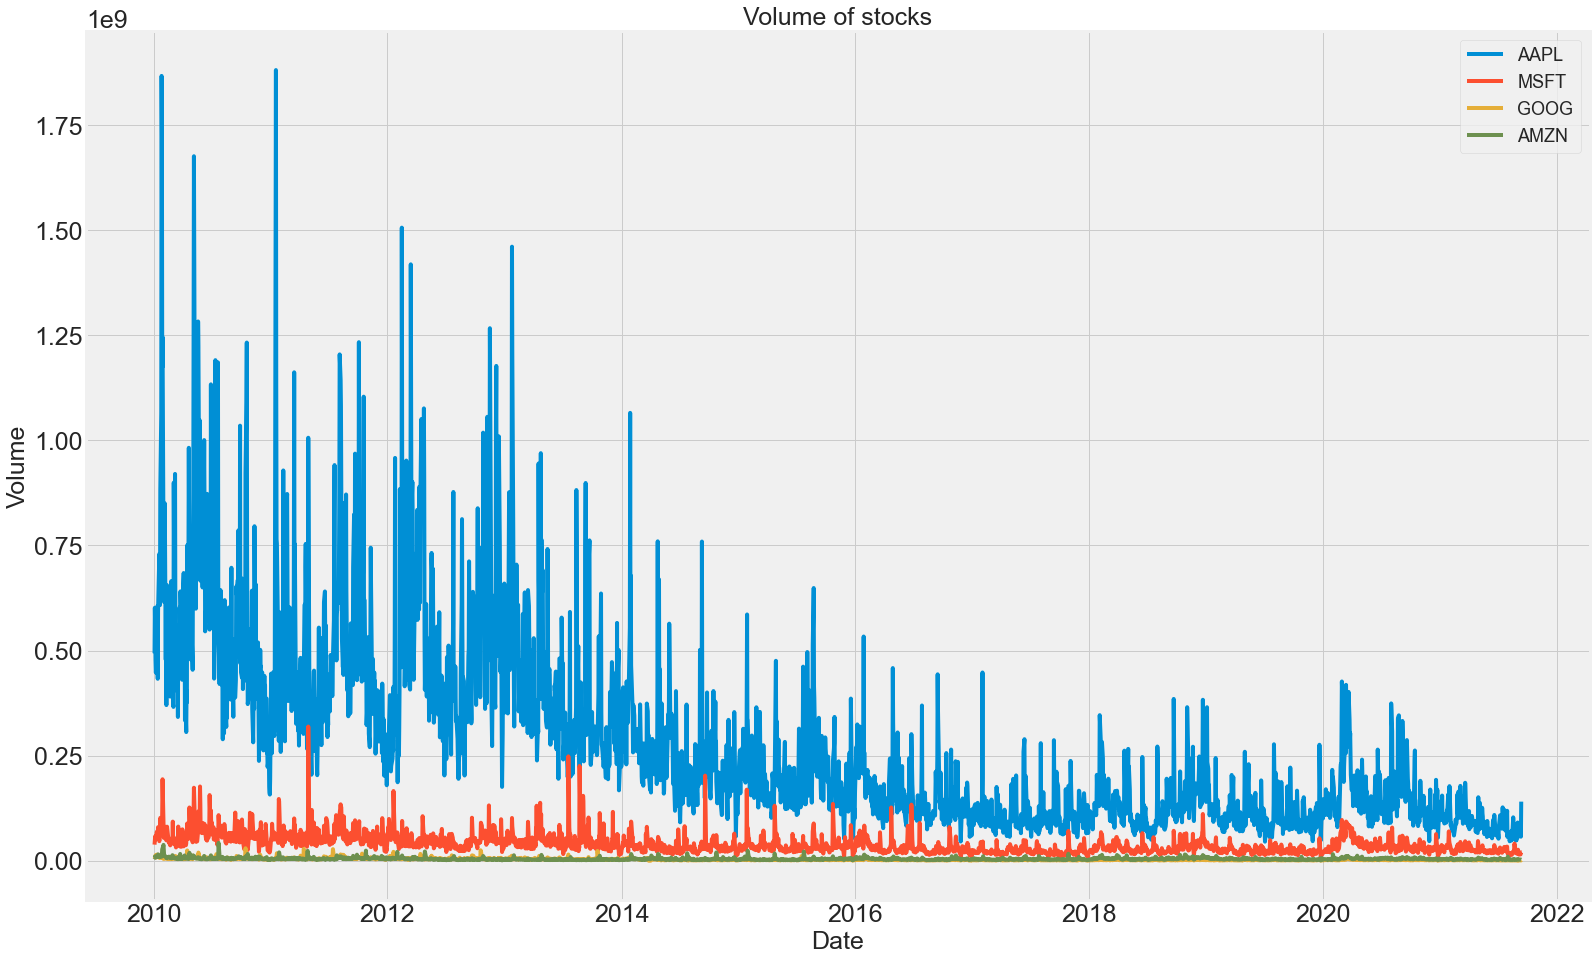

In [134]:
def volume_plot(param,stock_list):
    plt.rcParams["figure.figsize"] = (24,16)
    title = 'Volume of stocks'
    plt.figure()
    plt.title(title,fontsize=25)
    for stock in stock_list:
        stock_df = df[df['Name'] == stock]
        plt.plot(stock_df.index,stock_df[param],label = stock)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel('Date',fontsize=25)
    plt.ylabel('Volume',fontsize=25)
    plt.gca().yaxis.get_offset_text().set_fontsize(25)
    plt.legend(fontsize=18)
    plt.show()

volume_plot('Volume',stock_list1)


In [135]:
# let's look individually

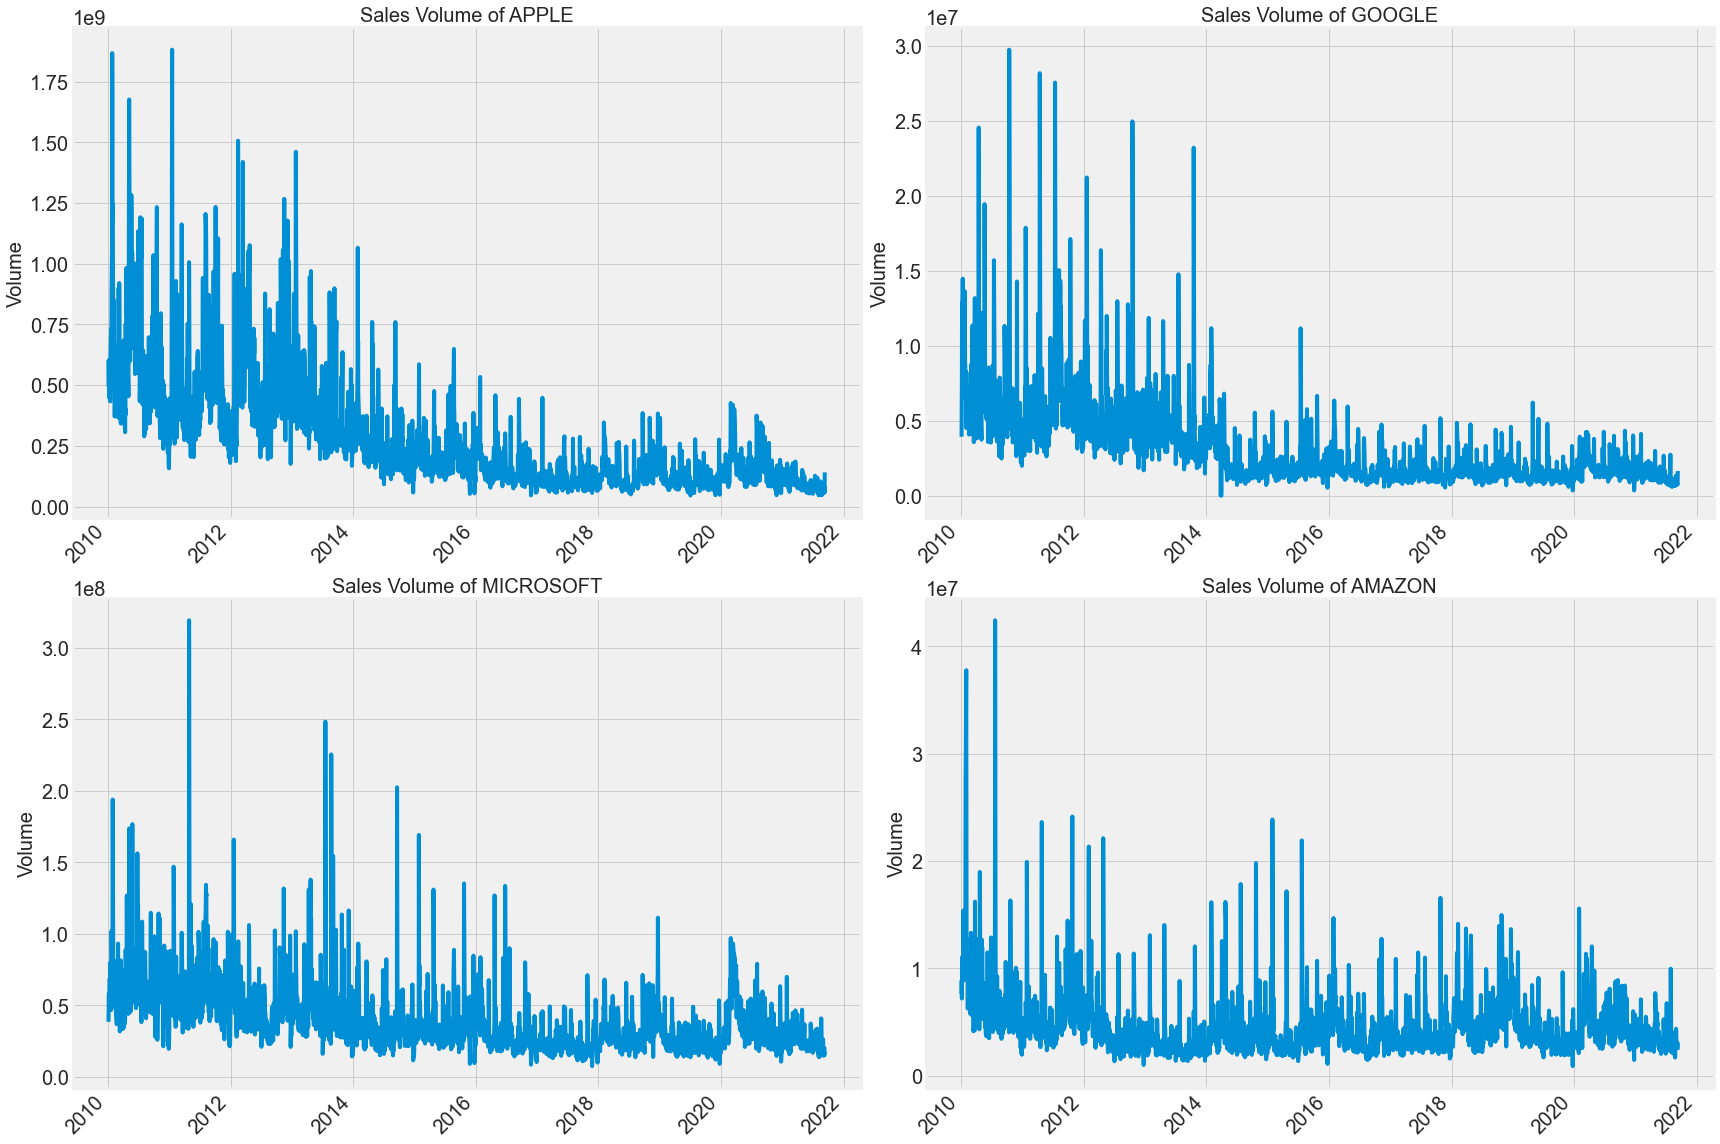

In [136]:
i=1
for company in company_list:
    
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume',fontsize=20)
    plt.xlabel(None)   
    plt.title(f"Sales Volume of {companies[i - 1]}",fontsize=20)  
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=20) 
    plt.gca().yaxis.get_offset_text().set_fontsize(20)
    i=i+1
    
plt.tight_layout()

In [137]:
print("Total volume of different stocks ")
for company in company_list:
    plt.figure()
    volume_df=company.groupby(['Name'])['Volume'].sum().reset_index()
    print(volume_df[['Name','Volume']])

Total volume of different stocks 
   Name        Volume
0  AAPL  809516680500
   Name      Volume
0  GOOG  9010815513
   Name        Volume
0  MSFT  114504500600
   Name       Volume
0  AMZN  13249919700


<Figure size 1728x1152 with 0 Axes>

<Figure size 1728x1152 with 0 Axes>

<Figure size 1728x1152 with 0 Axes>

<Figure size 1728x1152 with 0 Axes>

In [138]:
volume_flat={"Name":['Apple','Google','Microsoft','Amazon'],'Volume':[809516680500,9010815513,114504500600,13249919700]}
a=pd.DataFrame(data=volume_flat, index=[0, 1, 2, 3])

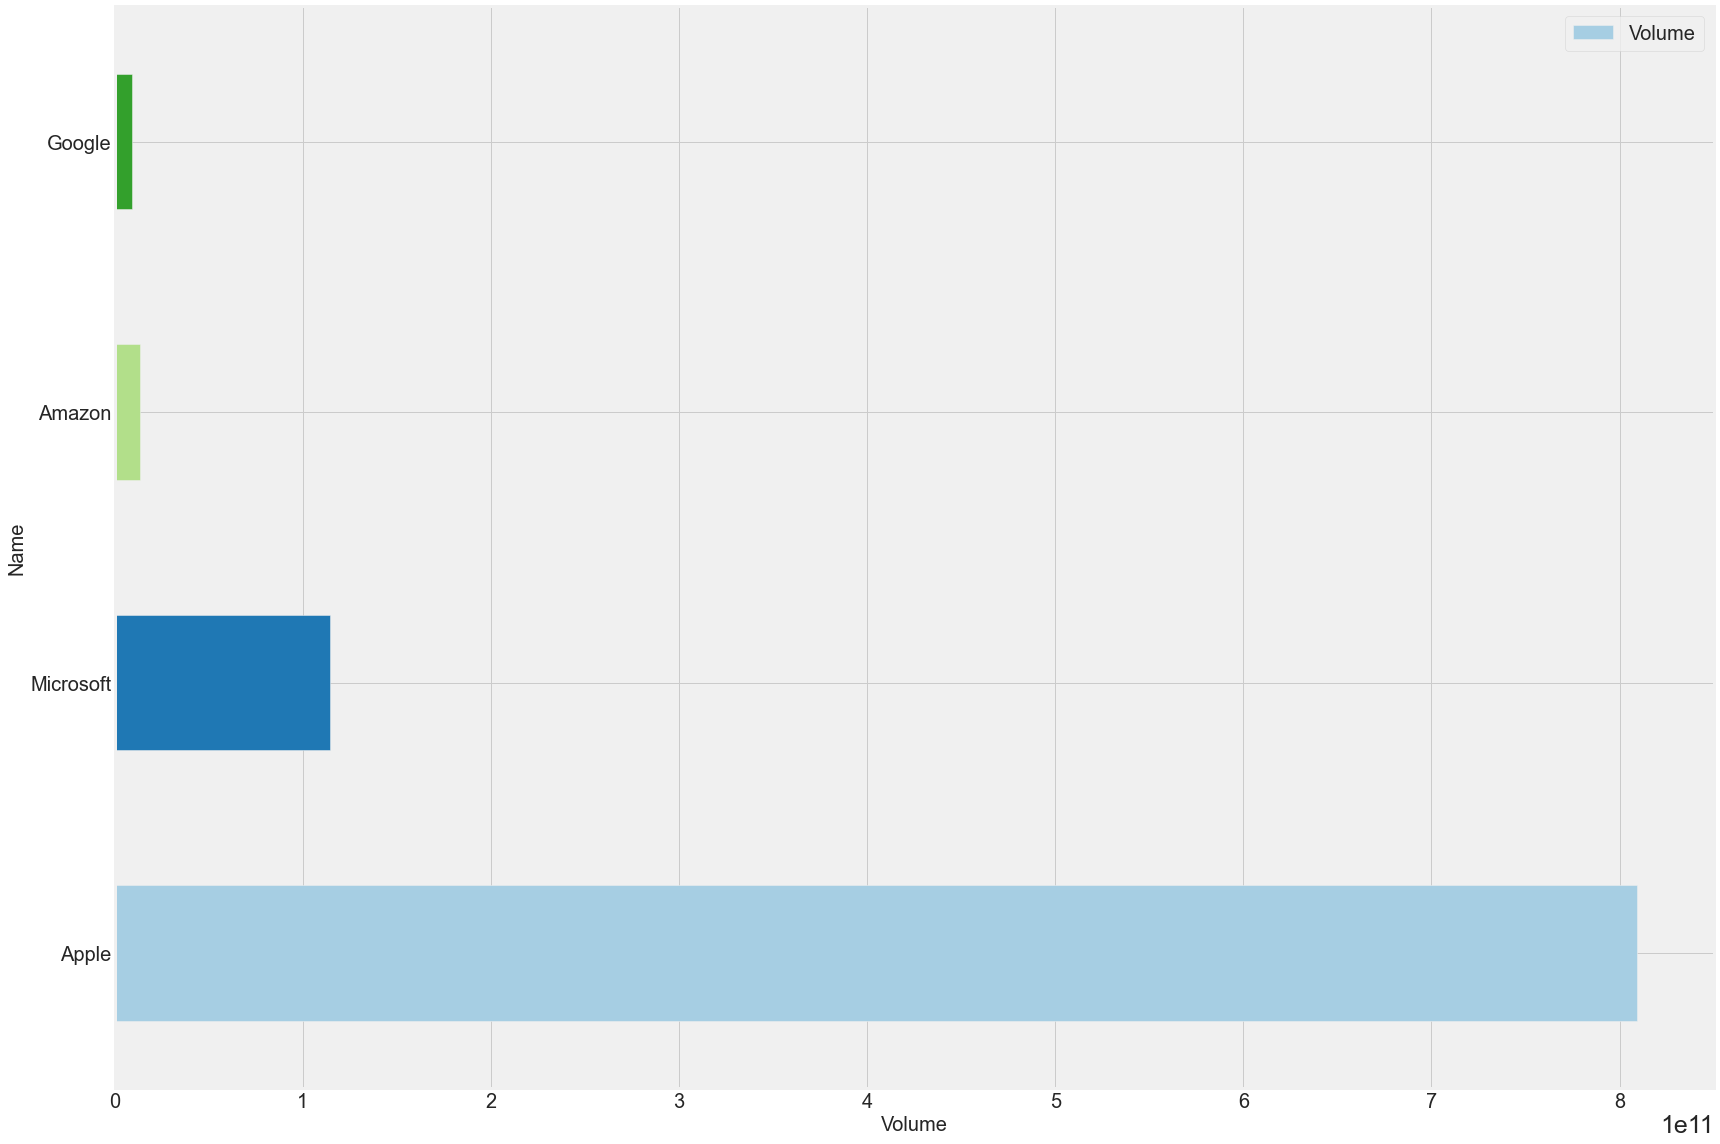

In [139]:
#plt.figure(figsize=(6,8))
a.sort_values(['Volume'], 
                    ascending=False).head(15).plot(kind='barh',
                                                   y='Volume', x='Name',
                                                   color=plt.cm.Paired(np.arange(15)))
plt.ylabel('Name',fontsize=20)
plt.xlabel('Volume',fontsize=20)   
 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.gca().xaxis.get_offset_text().set_fontsize(25)
plt.tight_layout()

### - Amazon is the highest for volume among the stock group

# What was the change in prices of the stock overtime?

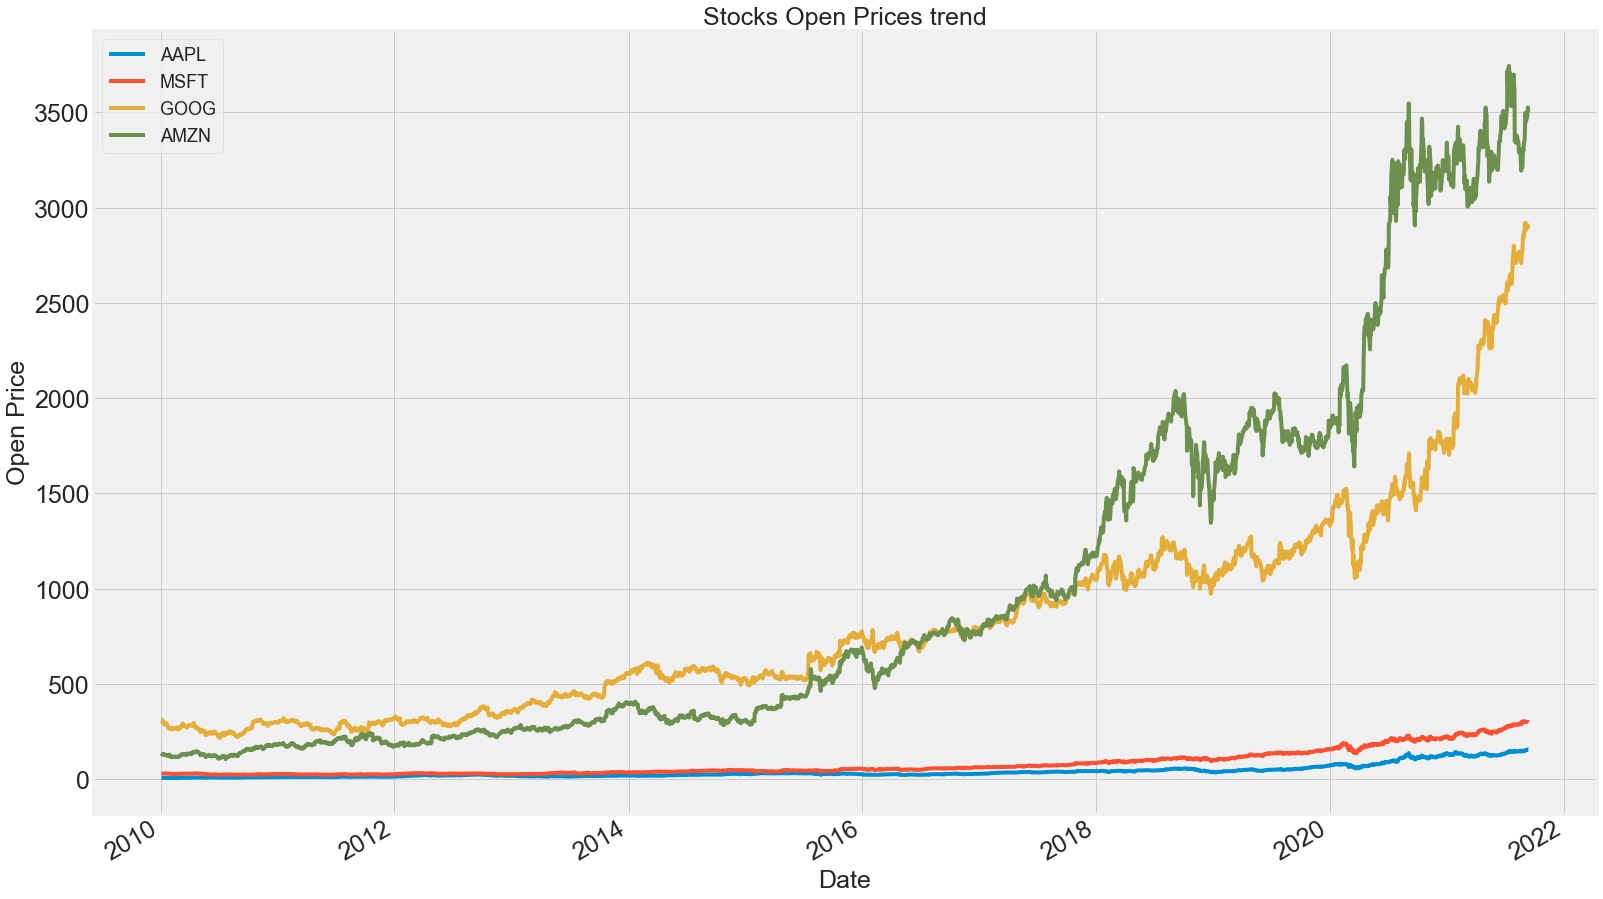

In [140]:
def prices_plot(param,stock_list):
    plt.rcParams["figure.figsize"] = (24,16)
    title = 'Stocks ' + param +' Prices trend'
    plt.figure()
    plt.title(title,fontsize=25)
    for stock in stock_list:
        stock_df = df[df['Name'] == stock]
        stock_df[param].plot(label = stock)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel('Date',fontsize=25)
    plt.ylabel('Open Price',fontsize=25)
    plt.gca().yaxis.get_offset_text().set_fontsize(25)
    plt.legend(fontsize=18)
    plt.show()
    
prices_plot('Open',stock_list1)


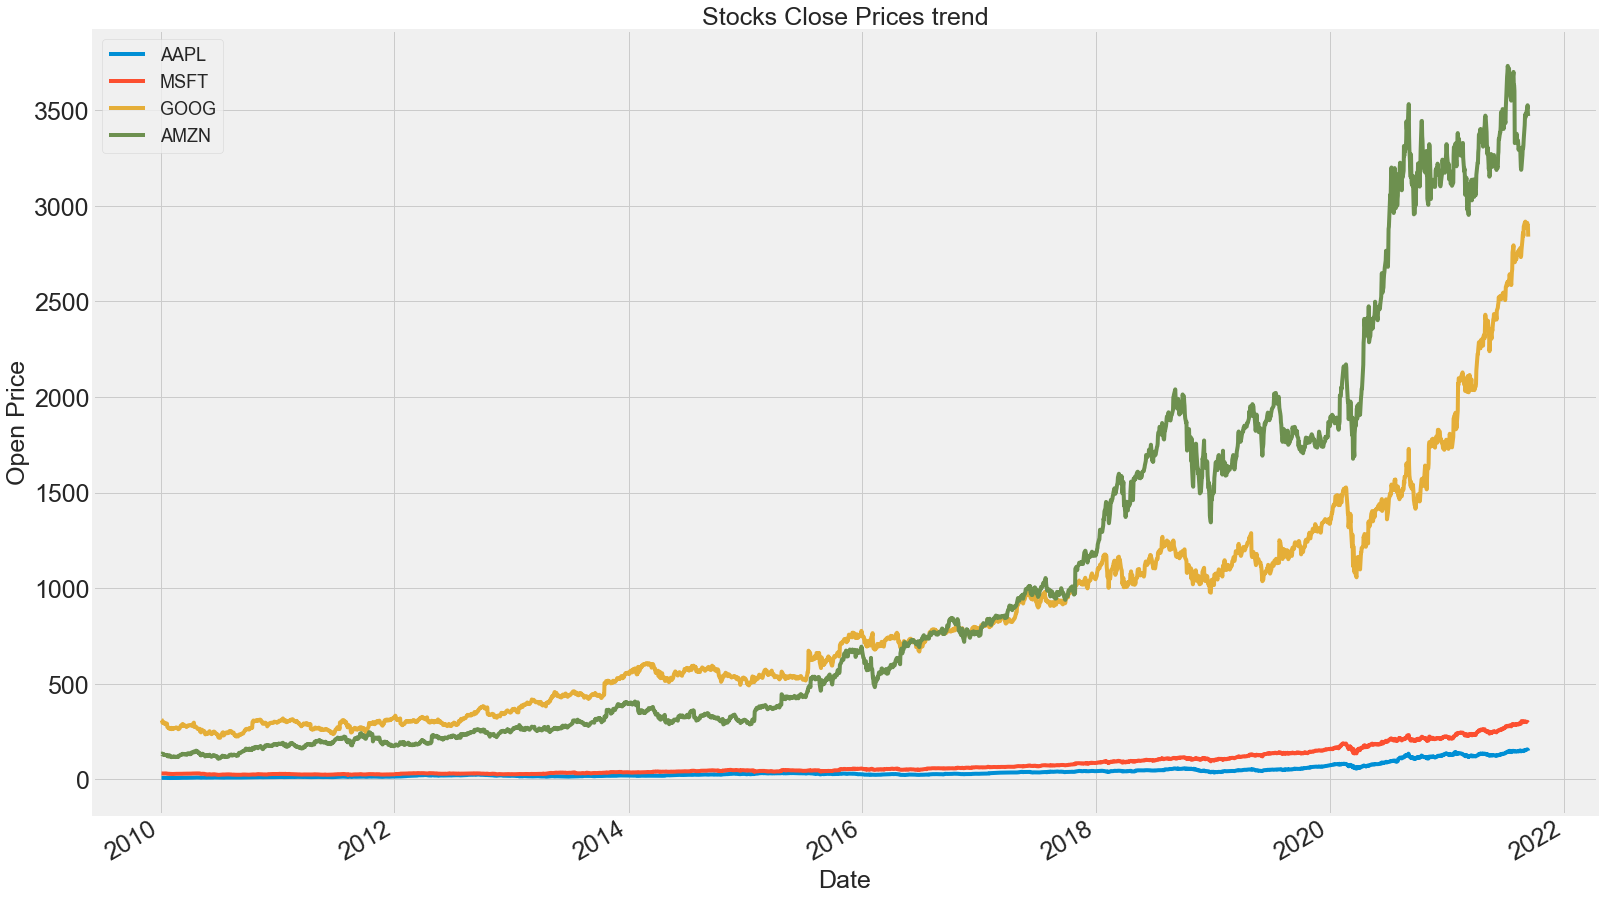

In [141]:
prices_plot('Close',stock_list1)

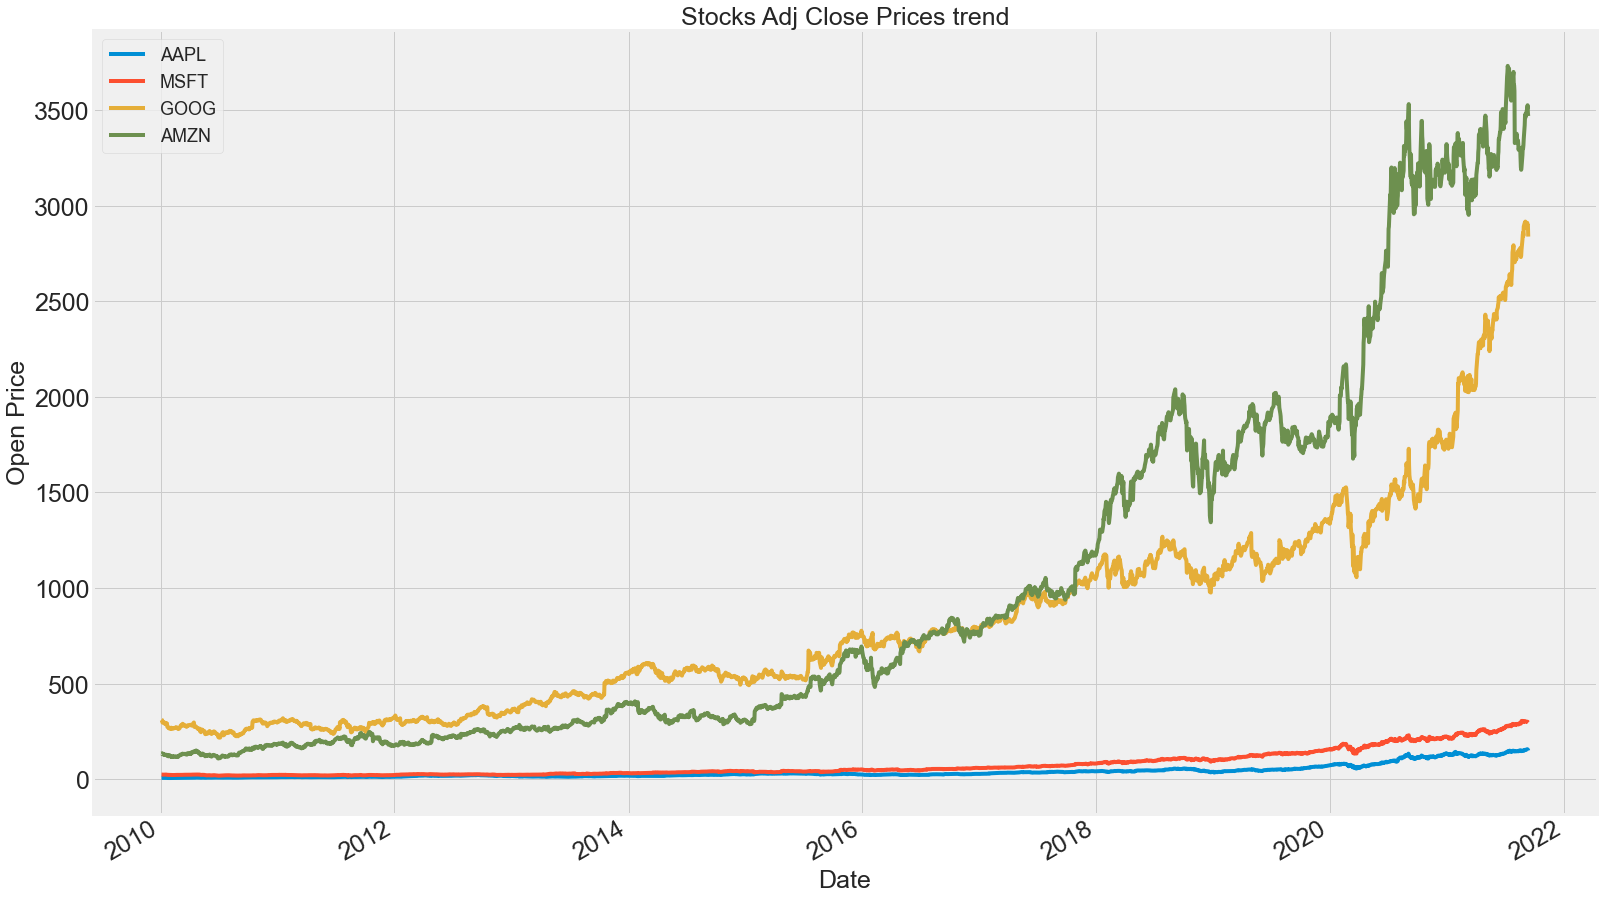

In [142]:
prices_plot('Adj Close',stock_list1)

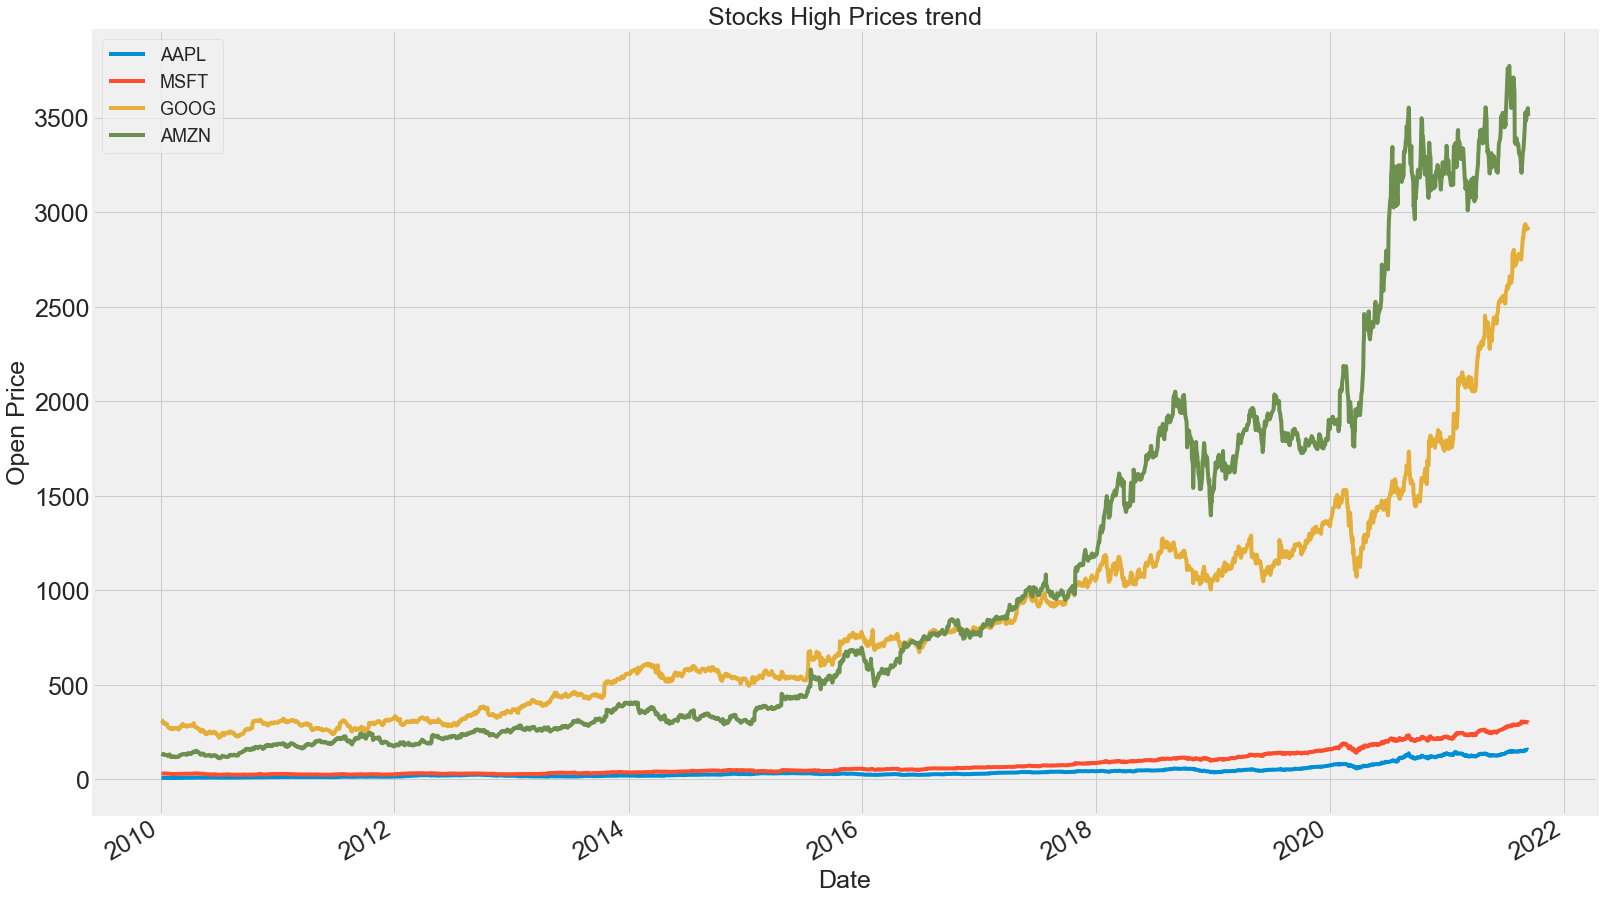

In [143]:
prices_plot('High',stock_list1)

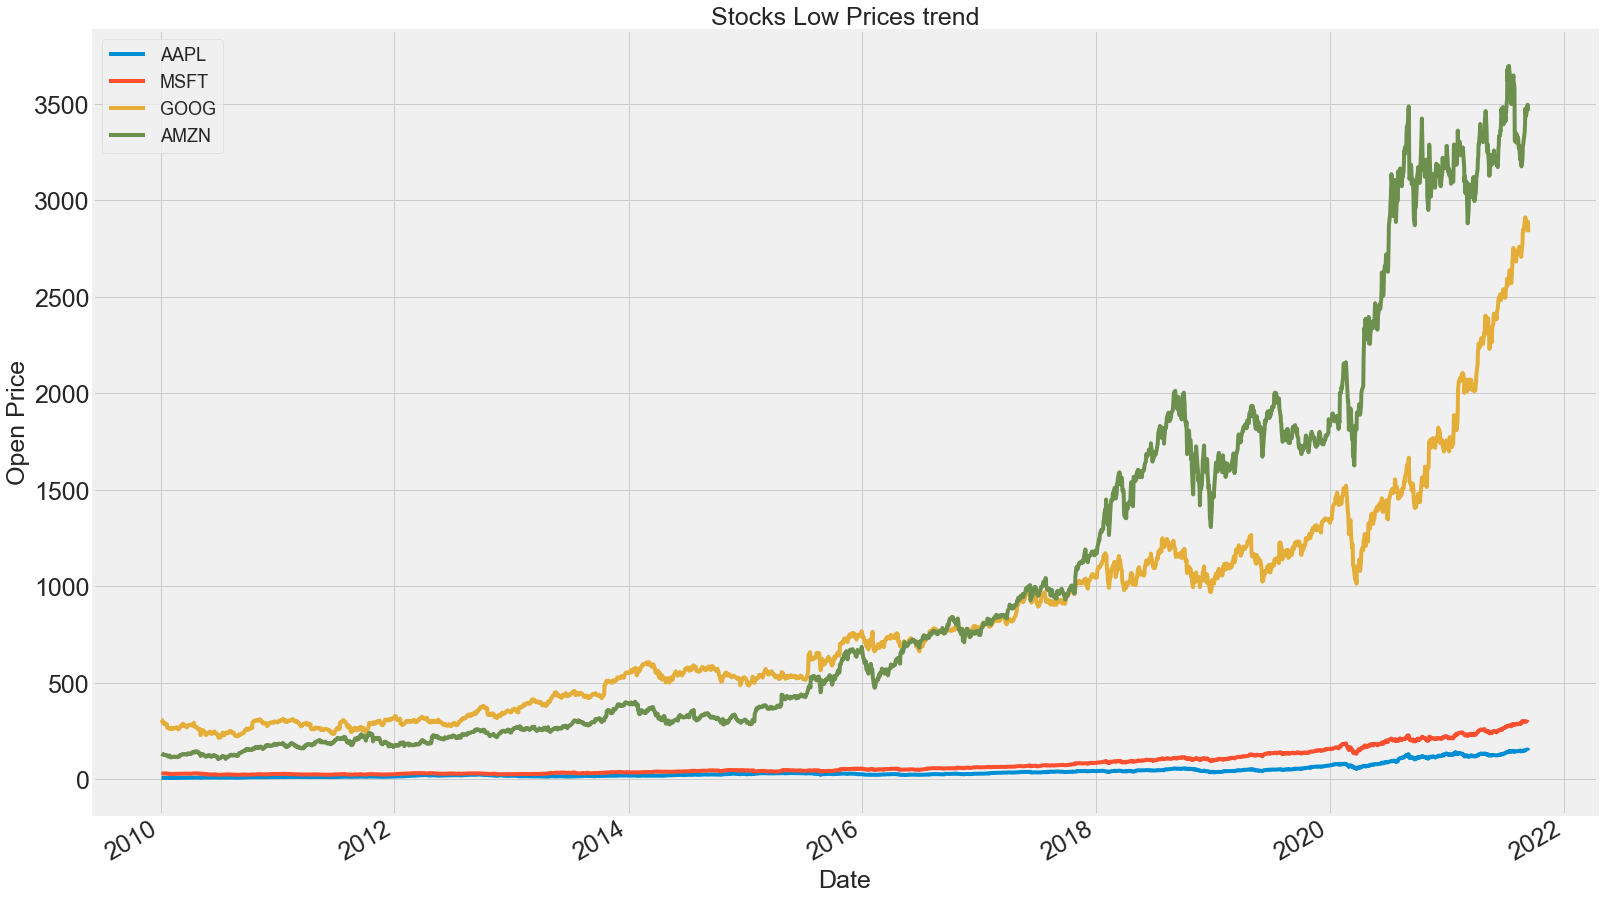

In [144]:
prices_plot('Low',stock_list1)

In [145]:
#Let's look individually

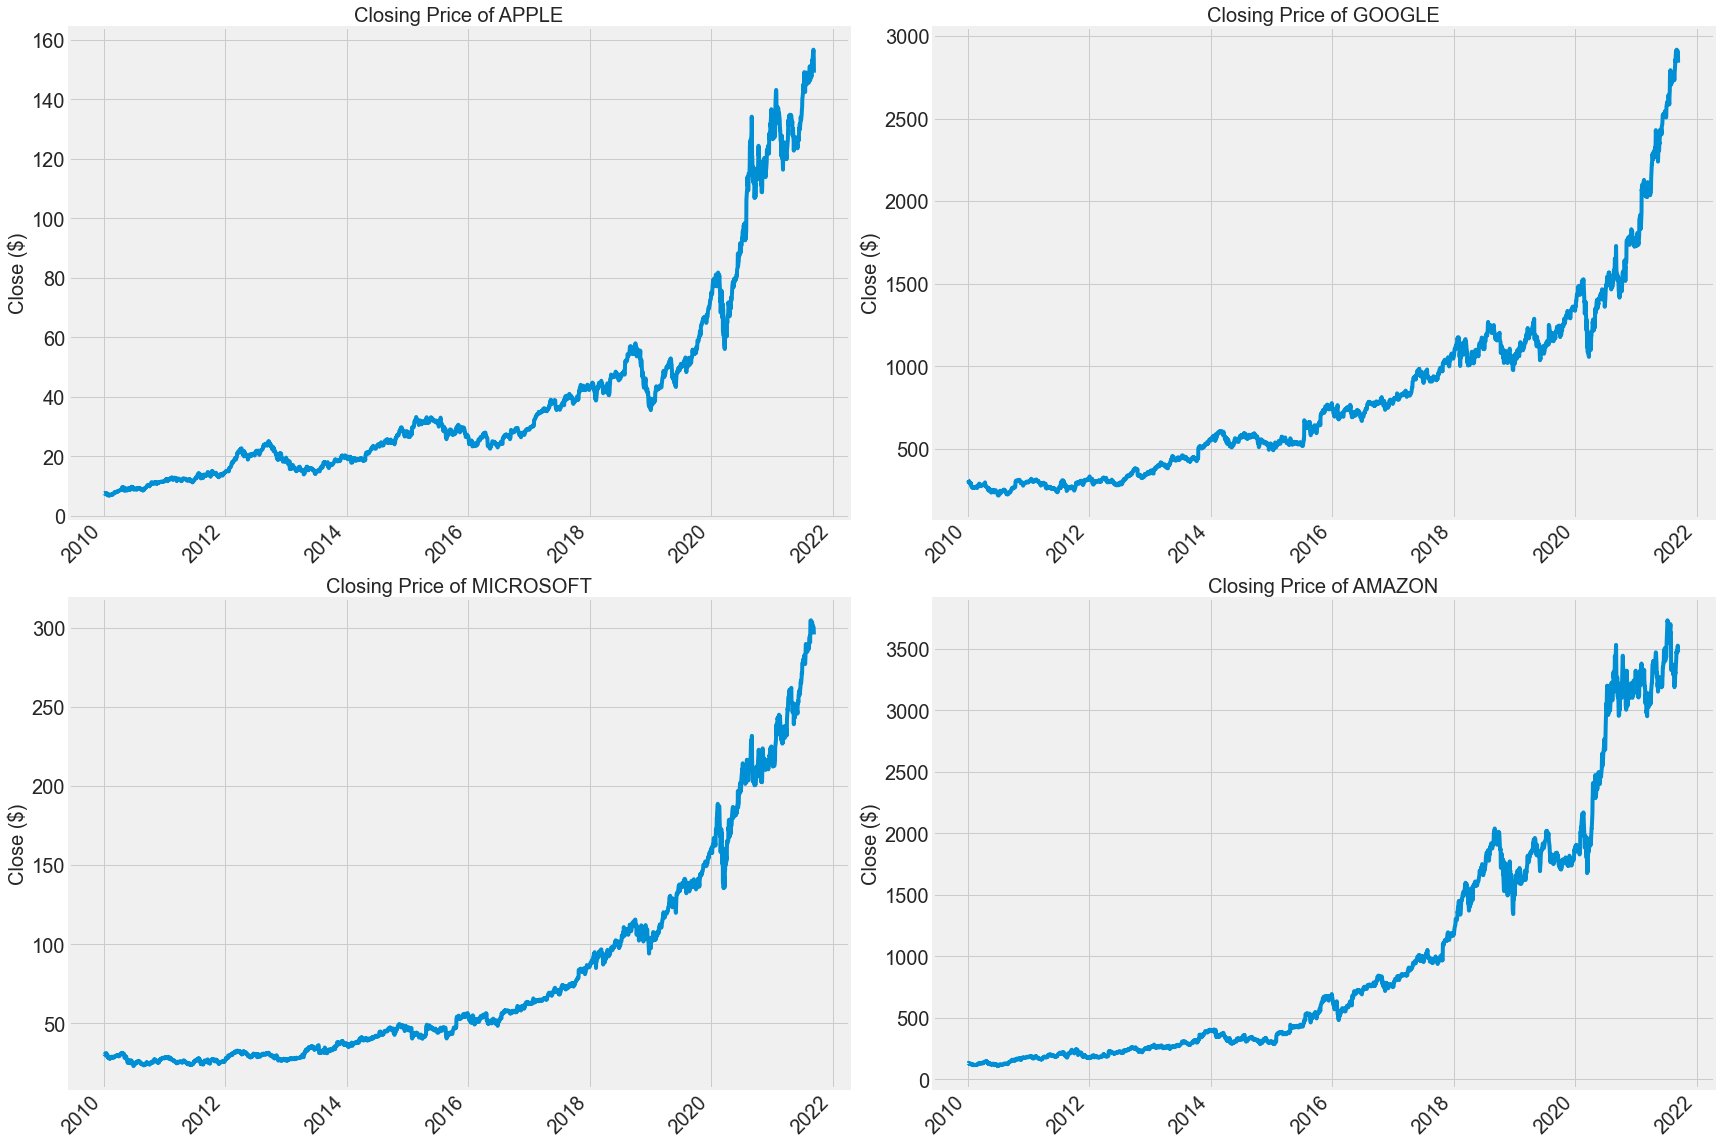

In [146]:
i=1

for company in company_list:
    
    plt.subplot(2,2,i)
    company['Close'].plot()
    plt.ylabel('Close ($)',fontsize=20)
    plt.xlabel(None)   
    plt.title(f"Closing Price of {companies[i - 1]}",fontsize=20)  
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=20) 
    
    i=i+1
    
plt.tight_layout()

## Let's get an overall look at the daily return using a histogram

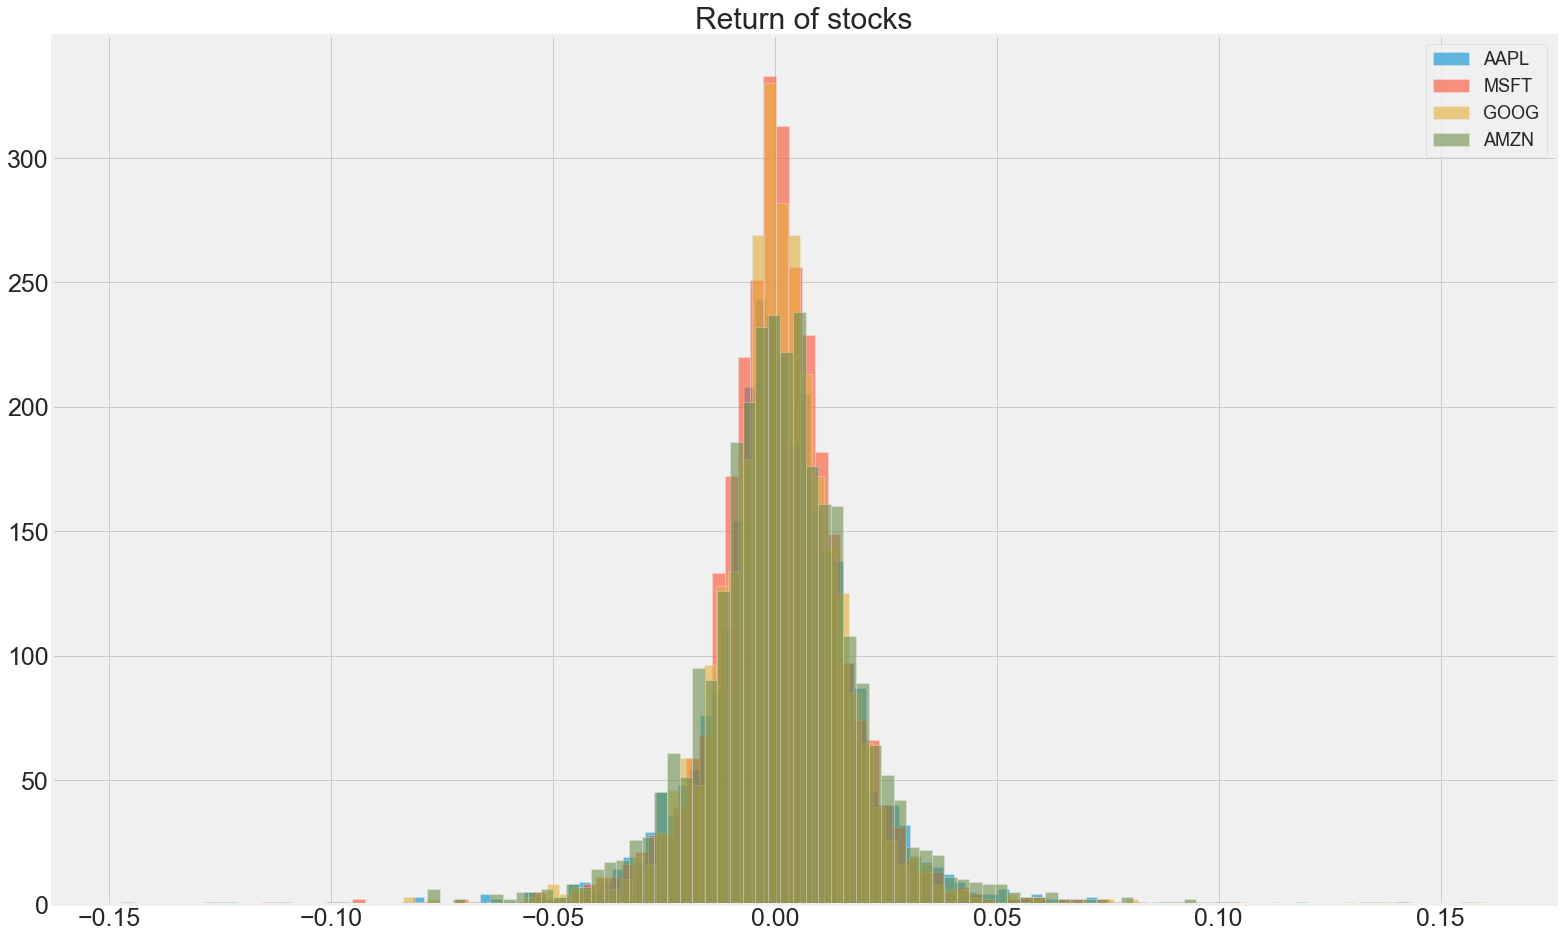

In [147]:
def histogram_plot(stock_list):
    title = 'Return of stocks'
    plt.figure()
    plt.title(title,fontsize=30)
    for stock in stock_list:
        stock_df = df[df['Name'] == stock]
        stock_df['returns'] = (stock_df['Adj Close']/stock_df['Adj Close'].shift(1)) -1
        stock_df['returns'].hist(bins = 100, label = stock, alpha = 0.6)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        
    plt.legend(fontsize=18)
    plt.show()
histogram_plot(stock_list1)

In [148]:
# Analyse individually

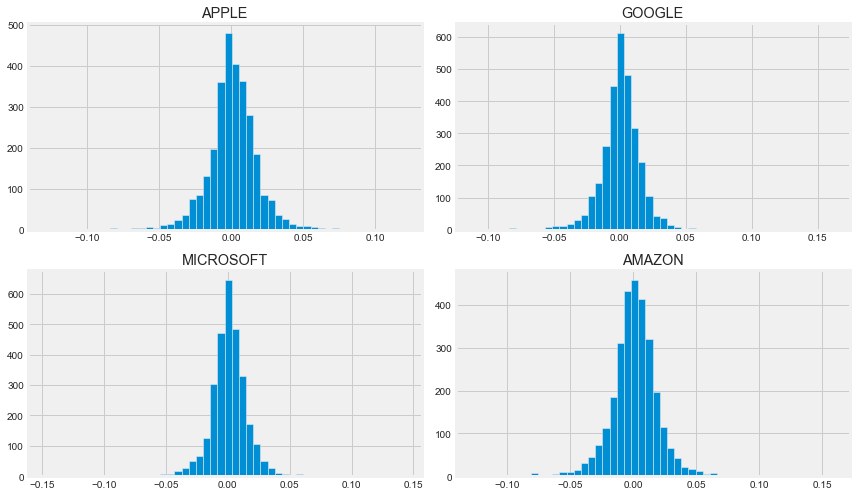

In [151]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    
    plt.title(f'{companies[i - 1]}')
    
plt.tight_layout()

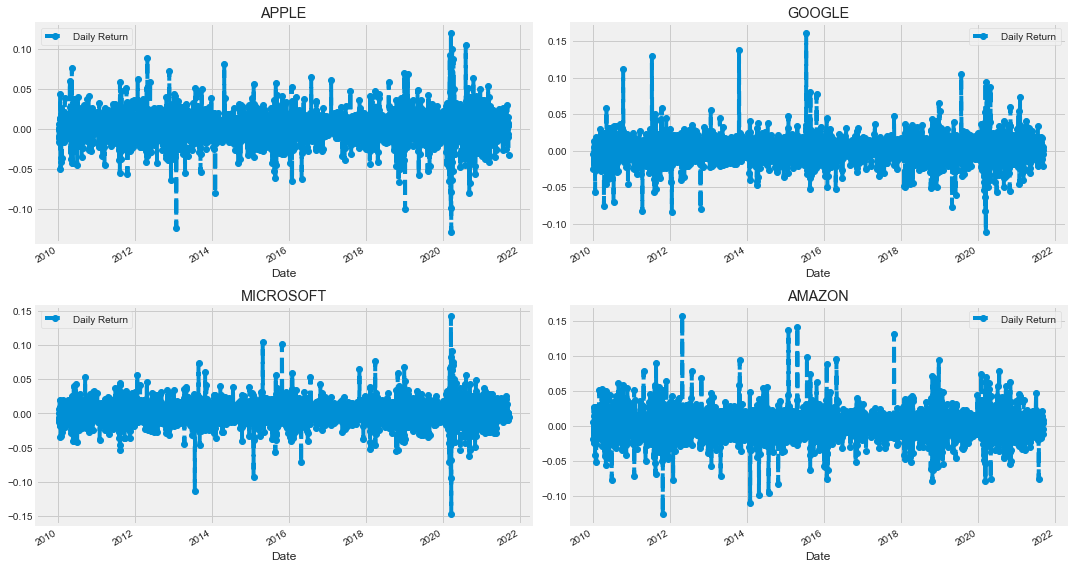

In [150]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

df_aapl['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

df_goog['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

df_msft['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

df_amzn['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [152]:
df_aapl

,Open,High,Low,Close,Adj Close,Volume,Name,Daily Return
Date,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL,0.006648
...,...,...,...,...,...,...,...,...
2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700,AAPL,0.004230
2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300,AAPL,0.015489
2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200,AAPL,-0.010084


In [153]:
for company in company_list:
    company_return = (company['Adj Close'].iloc[-1]/company['Adj Close'].iloc[0])-1
    print(f"Cumulative return of {company['Name'].iloc[1]} : {company_return}")

Cumulative return of AAPL : 21.699877277433654
Cumulative return of GOOG : 8.091532762494568
Cumulative return of MSFT : 11.347633904838514
Cumulative return of AMZN : 24.908514267937054


In [156]:
return_flat={"Name":['Apple','Google','Microsoft','Amazon'],'Cumulative Return':[21.699877277433654,8.091532762494568,11.347633904838514,24.908514267937054]}
b=pd.DataFrame(data=return_flat, index=[0, 1, 2, 3])

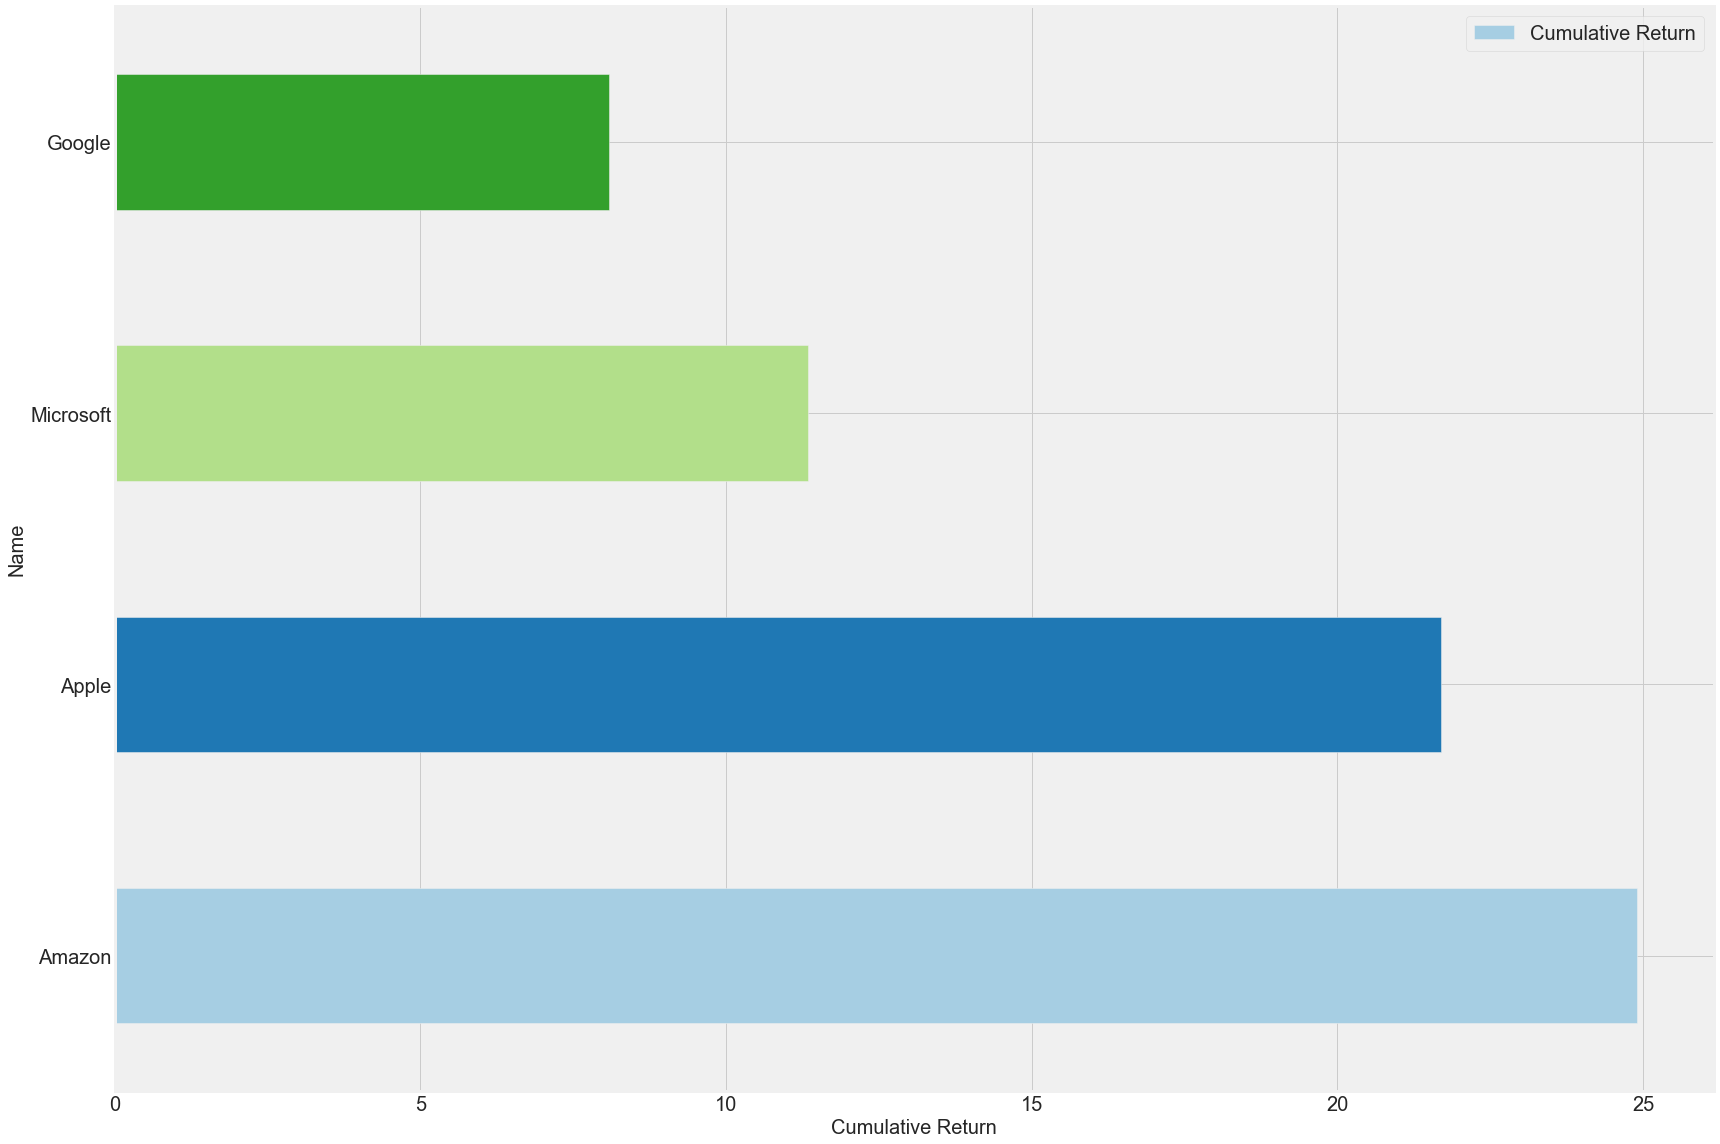

In [157]:
#plt.figure(figsize=(6,8))
b.sort_values(['Cumulative Return'], 
                    ascending=False).head(15).plot(kind='barh',
                                                   y='Cumulative Return', x='Name',
                                                   color=plt.cm.Paired(np.arange(15)))
plt.ylabel('Name',fontsize=20)
plt.xlabel('Cumulative Return',fontsize=20)   
 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.gca().xaxis.get_offset_text().set_fontsize(25)
plt.tight_layout()

# What is the moving average of 4 stocks?

In [158]:
moving_avg_days = [10, 50, 100,200,500,1000,2000]

for ma in moving_avg_days:
    for company in company_list:
        column_name = f"MA{ma}"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

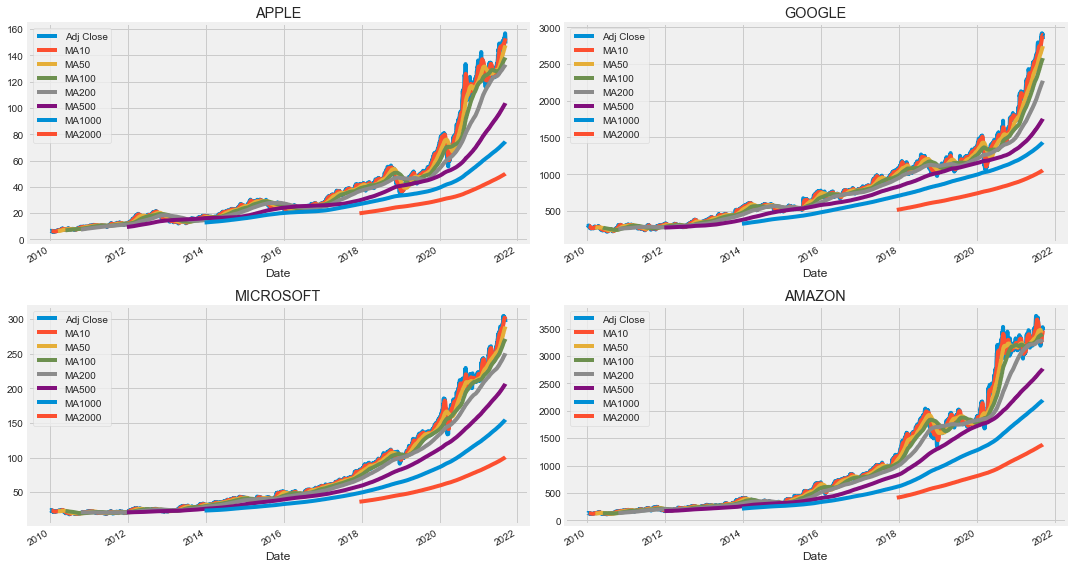

In [159]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

df_aapl[['Adj Close', 'MA10', 'MA50', 'MA100','MA200','MA500','MA1000','MA2000']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

df_goog[['Adj Close', 'MA10', 'MA50', 'MA100','MA200','MA500','MA1000','MA2000']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

df_msft[['Adj Close', 'MA10', 'MA50', 'MA100','MA200','MA500','MA1000','MA2000']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

df_amzn[['Adj Close', 'MA10', 'MA50', 'MA100','MA200','MA500','MA1000','MA2000']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [160]:
df_aapl

,Open,High,Low,Close,Adj Close,Volume,Name,Daily Return,MA10,MA50,MA100,MA200,MA500,MA1000,MA2000
Date,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL,0.001729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL,-0.015906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL,-0.001849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL,0.006648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700,AAPL,0.004230,150.923999,146.064654,137.475687,132.129275,102.808925,73.891894,49.683452
2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300,AAPL,0.015489,151.621999,146.540236,137.701877,132.325335,103.012561,74.010437,49.754131
2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200,AAPL,-0.010084,152.170999,146.950869,137.915655,132.510459,103.215173,74.127689,49.824076


# What is the correlation between different stocks closing prices?

In [168]:
df1=df_aapl[['Adj Close']].reset_index()
df2=df_goog[['Adj Close']].reset_index()
df3=df_msft[['Adj Close']].reset_index()
df4=df_amzn[['Adj Close']].reset_index()

In [169]:
# Let's make dataframe with close values corresponding to stock names 

In [170]:
a=pd.merge(df1,df2,on=['Date'])

In [171]:
b=pd.merge(a,df3,on=['Date'])
close_values=pd.merge(b,df4,on=['Date'])
close_values.set_index('Date',inplace=True)

In [172]:
close_values.columns=['Apple','Google','Microsoft','Amazon']

In [173]:
close_values

,Apple,Google,Microsoft,Amazon
Date,,,,
2010-01-04,6.562591,312.204773,23.948717,133.899994
2010-01-05,6.573935,310.829926,23.956453,134.690002
2010-01-06,6.469369,302.994293,23.809435,132.250000
2010-01-07,6.457407,295.940735,23.561821,130.000000
2010-01-08,6.500339,299.885956,23.724321,133.520004
...,...,...,...,...
2021-09-03,154.300003,2895.500000,301.140015,3478.050049
2021-09-07,156.690002,2910.379883,300.179993,3509.290039
2021-09-08,155.110001,2897.669922,300.209991,3525.500000


<AxesSubplot:>

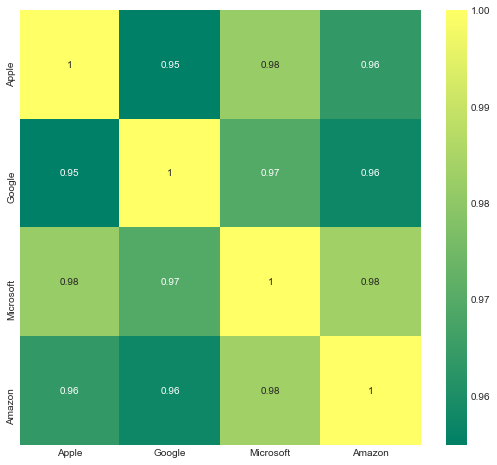

In [174]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(close_values.corr(), annot=True, cmap='summer')

In [181]:
#all the technology comapnies are positively correlated.

In [175]:
# Now that we have all the closing prices, 
# let's go ahead and get the daily return for all the stocks

In [176]:
returns = close_values.pct_change()
returns.head()

,Apple,Google,Microsoft,Amazon
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,0.000323,0.005900
2010-01-06,-0.015906,-0.025209,-0.006137,-0.018116
2010-01-07,-0.001849,-0.023280,-0.010400,-0.017013
2010-01-08,0.006648,0.013331,0.006897,0.027077


In [177]:
# Now we can compare the daily percentage return of two stocks to check how correlated.

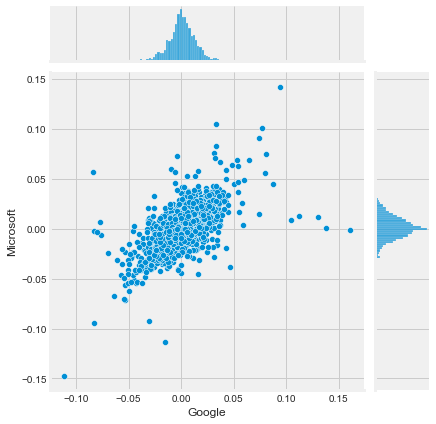

In [178]:
sns.jointplot(x='Google', y='Microsoft', data=returns, kind='scatter')

### - Microsoft and Amazon had the strongest correlation of daily stock return

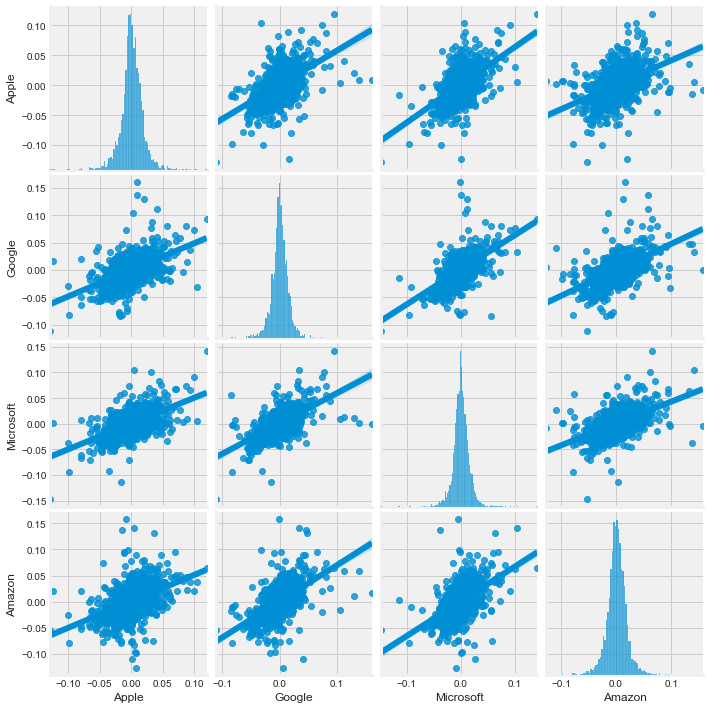

In [179]:
sns.pairplot(returns, kind='reg')

<AxesSubplot:>

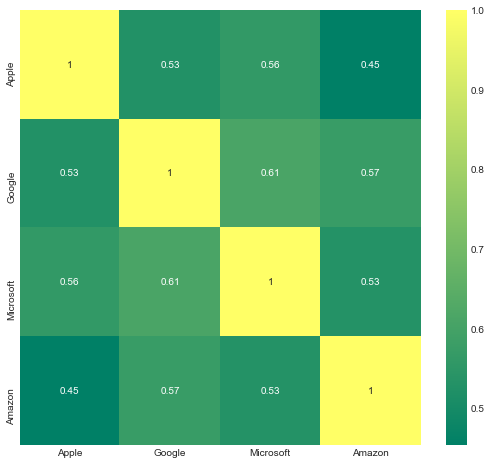

In [180]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(returns.corr(), annot=True, cmap='summer')

### - All the technology companies are positively correlated.

# Predicting the closing price stock price of APPLE inc by using Facebook Prophet 

In [106]:
try:
    from fbprophet.plot import plot_plotly
    from fbprophet import Prophet
except:
    !conda install -c conda-forge fbprophet -y    # install Faceboo Prophet
    from fbprophet.plot import plot_plotly
    from fbprophet import Prophet
    

In [107]:
# Plot historical data of close price

In [108]:
def plot_close_val(data_frame, column, stock):
    
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock,fontsize=20 )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=16)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=16)
    plt.show()

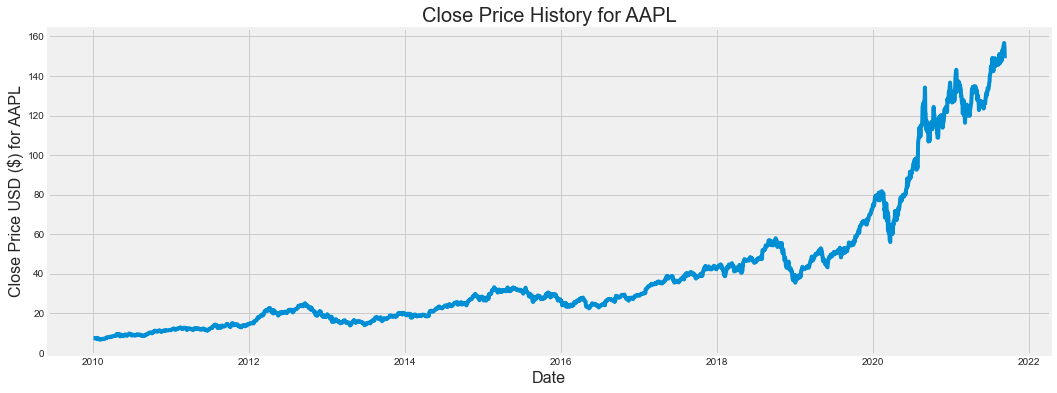

In [109]:
plot_close_val(df_aapl, 'Close', 'AAPL') # Plot the Closing Price

In [110]:
def fb_prophet_plot(df, param, stock):
    # Check the dataset
    #df.head()
    # Create Dataset based on the FB Prophet standard ds/y
    df2 = pd.DataFrame([], columns = ['ds', 'y'])
    df2.columns=['ds','y']
    df2['ds']=pd.to_datetime(df.index,format='%Y-%m')
    #Assign the Parameter
    df2['y']=df[param].values
    #check the new DS
    #df2.head()
    
    #create a new Prophet Model
    model=Prophet(interval_width=0.95,yearly_seasonality=True)
    #model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    #Fit the Model
    model.fit(df2)
    #Predict the future
    future=model.make_future_dataframe(periods=365)
    forecast=model.predict(future)
    #Save the predicted model
    preds= forecast['yhat'][:-365]
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))
    #plot the graph
    title = 'FB Prophet predictions for ==> ' + stock
    plt.figure(figsize=(16,8))
    plt.plot(df2.ds,preds,color='#555555',label=' Predictions')
    plt.plot(df2.ds,df2.y,color='#1155FF',label='Actual')
    plt.title(title)
    plt.legend()
    plt.show()
    
    figure=model.plot(forecast,xlabel='Date',ylabel='Price')
    figure.set_size_inches(16,8)
    plt.title(title)
    plt.plot(forecast['ds'], forecast['trend'], 'b-')
    plt.legend('Predictions','Actual'); plt.xlabel('Date'); plt.ylabel('Close price')
    plt.title('Close Price Trend');
    model.plot_components(forecast)
    plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat  yhat_lower  yhat_upper
3298 2022-09-01  198.894349  180.271460  217.027824
3299 2022-09-02  198.879230  180.683994  216.881053
3300 2022-09-03  199.079573  182.993674  216.234257
3301 2022-09-04  199.145349  181.344898  216.849408
3302 2022-09-05  199.188751  180.695396  218.019179
3303 2022-09-06  199.280195  181.222246  217.098409
3304 2022-09-07  199.309951  180.036314  216.548227
3305 2022-09-08  199.304437  182.003845  218.443835
3306 2022-09-09  199.232104  179.941399  216.737471
3307 2022-09-10  199.384415  180.203031  217.617686


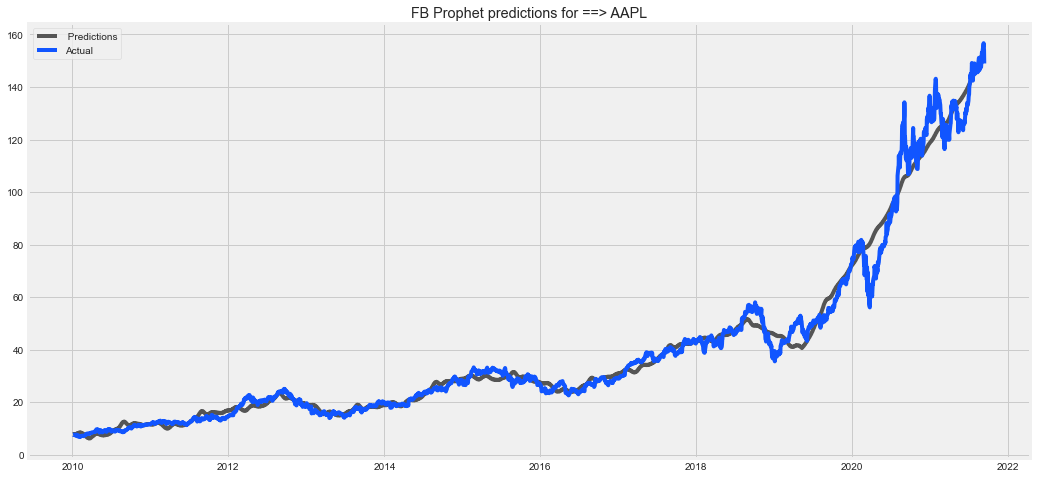

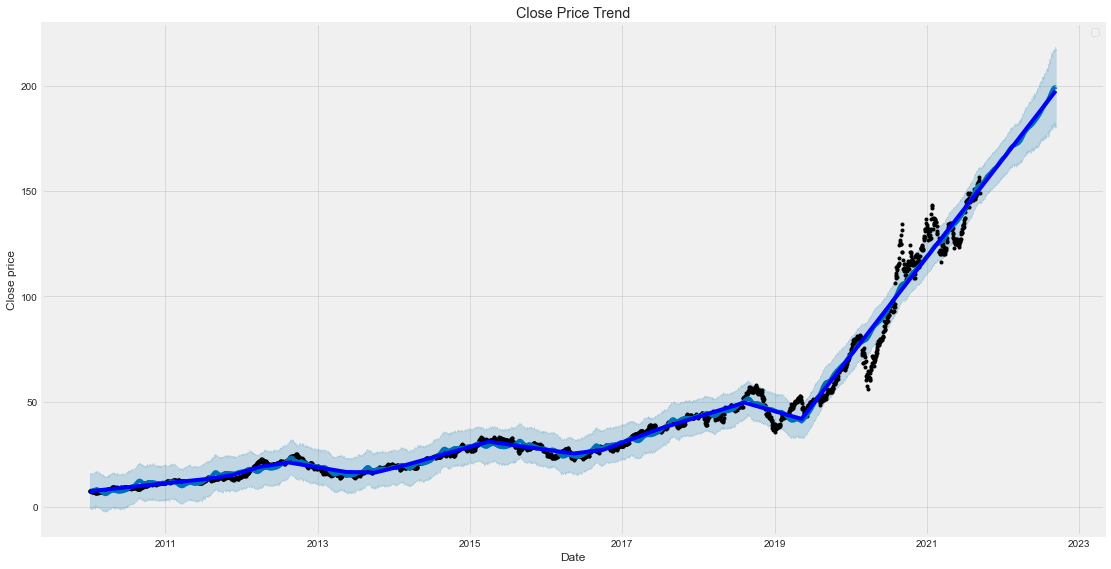

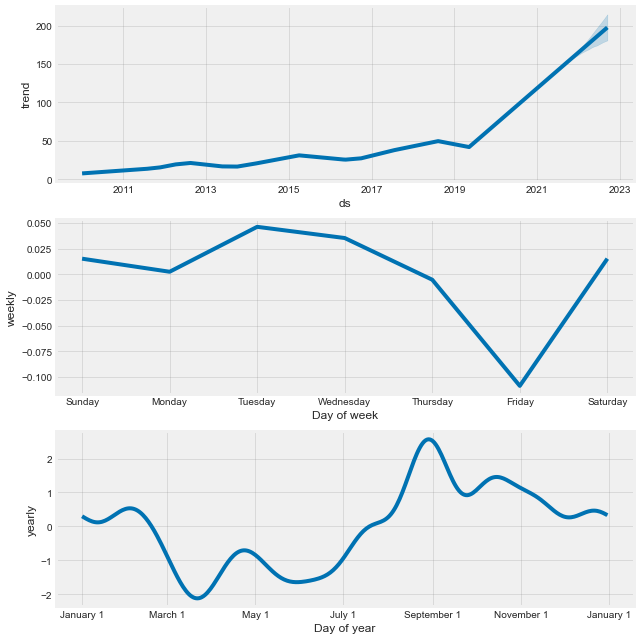

In [111]:
fb_prophet_plot(df_aapl, 'Close', 'AAPL')